# Processing simple log files examples


### Overview

* This notebook walks through the steps to extract data from 100 simple log files such as those that could be generated from a quick online survey experiment.


* The files look like this:


```
        -----------------------------------
        | First memory: vacation at beach |
        |                                 |
        | Favorite color: red             |
        |                                 |
        | Age of first bike: 39           |
        |                                 |
        | Gender: F                       |
        -----------------------------------
    ```

  with four lines containing a field name and its value, separated by a `:`.
 

* The task is to process each file and extract these data into a list of dicationaries structure, e.g.:

    ```
       [
         {'Age of first bike': '39',
          'Favorite color': 'red',
          'First memory': 'vacation at beach',
          'Gender': 'F',
          'pID': 's000'},
          
         {'Age of first bike': '10',
          'Favorite color': 'orange',
          'First memory': 'vacation at beach',
          'Gender': 'F',
          'pID': 's001'},
          
         {'Age of first bike': '3',
          'Favorite color': 'black',
          'First memory': 'getting a dog',
          'Gender': 'M',
          'pID': 's002'},
          
          ...
          
        ]
    ```

-----------------------
#### HISTORY

* 11/2/18 mbod

### Working out the steps

#### The data

* The data are in 100 separate text (`.txt`) files in a the folder `toy_data`


* To list the contents of a folder/directory you can use the `listdir()` function from the `os` (operating system) module


#### MODULES

* __MODULES__ are packages of Python code that group together related functions. (They are similar to libraries/packages in R.)

* You use the `import MODULE_NAME` syntax to bring a module into your workspace or script.

* Import statements should be grouped together at the top of the notebook or script

In [228]:
import os

* List functions and attributes for a module using `dir(MODULE)`, e.g.

    `dir(os)`
    
    
* Show the help text for a module and functions within a module using `help(MODULE)`, e.g.

    `help(os)`
    
    `help(os.listdir)`

### List the files in a directory

* `os.listdir()` function takes the path to a directory and returns a `list` of its contents


* The path can either be:
    * an __absolute path__, e.g. `os.listdir('/data00/jupyterhub/mydir')` (a path starting with a forward slash) 
    * a __relative path__, e.g. `os.listdir('mydir')` where `mydir` is in the same location as the notebook or script
    
    
* The `toy_data` folder should be in the same folder as this notebook, so we can use a ralative path

In [229]:
logs_to_process=os.listdir('toy_data')

* Use the `len()` function to find out how many files are in the `toy_data` directory

In [230]:
len(logs_to_process)

100

* Show the first 15 files

In [231]:
logs_to_process[:15]

['s000.txt',
 's001.txt',
 's002.txt',
 's003.txt',
 's004.txt',
 's005.txt',
 's006.txt',
 's007.txt',
 's008.txt',
 's009.txt',
 's010.txt',
 's011.txt',
 's012.txt',
 's013.txt',
 's014.txt']

* What is returned is a list of strings where each string is the filename in the folder


* Because the `os.listdir()` function returns a list we can use list indexing and slicing to access individual filenames

In [232]:
logs_to_process[0]

's000.txt'

In [233]:
logs_to_process[1]

's001.txt'

In [234]:
logs_to_process[10:15]

['s010.txt', 's011.txt', 's012.txt', 's013.txt', 's014.txt']

### Accessing the content of a file

* The `open()` function can be used to access the content of a file

In [235]:
open('toy_data/s000.txt')

<_io.TextIOWrapper name='toy_data/s000.txt' mode='r' encoding='UTF-8'>

* It will return a file input object that has various functions to let you access parts (e.g. line by line) or all of the contents.


* For a small text file you can read the entire contents at once with the `.read()` function

In [236]:
txt=open('toy_data/s000.txt').read()

* `txt` points to the string created from reading in the file `toy_data/s000.txt`

In [237]:
txt

'\n\nFirst memory: vacation at beach\n\nFavorite color: red\n\nAge of first bike: 39\n\nGender: F\n\n'

* Using the `print()` function will render the line feeds and other spacing (`\n` special characters)

In [238]:
print(txt)



First memory: vacation at beach

Favorite color: red

Age of first bike: 39

Gender: F




#### REMEMBER: `strings` are `lists` of characters

* So you can index and slice them

In [239]:
txt

'\n\nFirst memory: vacation at beach\n\nFavorite color: red\n\nAge of first bike: 39\n\nGender: F\n\n'

* Show the number of characters in the string

In [240]:
len(txt)

90

#### Indexing

* Get the 10th, 17th and last characters

In [241]:
txt[9]  # 10th character - remember zero index = 1st character

'e'

In [242]:
txt[16]

'v'

In [243]:
txt[-1]

'\n'

#### Slicing 

* Get the first 12 characters in the string

In [244]:
txt[0:12]

'\n\nFirst memo'

#### Using string functions

* There are a bunch of different string functions that you can use

In [245]:
dir(str)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

* Here the `.split()` function is useful to split up the text file contents into lines

* The `split()` function takes a string as its argument and returns a list of substrings created by finding each instance of the split string

* For example with the string: `a-b-c-d-e-f`

  ```
  'a-b-c-d-e-f'.split('-')
  ```
  
  will return a list
  
  ```
  ['a','b','c','d','e','f']
  ```

In [246]:
'a-b-c-d-e-f'.split('-')

['a', 'b', 'c', 'd', 'e', 'f']

#### Spliting text file into lines

* use the `\n` character to split up the `txt` string

In [247]:
txt

'\n\nFirst memory: vacation at beach\n\nFavorite color: red\n\nAge of first bike: 39\n\nGender: F\n\n'

In [248]:
items=txt.split('\n')

In [249]:
items

['',
 '',
 'First memory: vacation at beach',
 '',
 'Favorite color: red',
 '',
 'Age of first bike: 39',
 '',
 'Gender: F',
 '',
 '']

* Note the empty strings `''` representing the points between the `\n\n` sequences


* Can use list indexing to pick out specific lines from the `items` list. 
    * e.g. to get the `Age of first bike` line:

In [250]:
items[6]

'Age of first bike: 39'

* A better split character sequence would be a double line feed, `\n\n`:

In [251]:
items2=txt.split('\n\n')

In [252]:
items2

['',
 'First memory: vacation at beach',
 'Favorite color: red',
 'Age of first bike: 39',
 'Gender: F',
 '']

### Split field names and values

In [253]:
items2[1]

'First memory: vacation at beach'

* Use the `: ` string to create a list of two items
    1. the field name
    2. the value

In [254]:
items2[1].split(': ')

['First memory', 'vacation at beach']

### Use a `for` loop to process each item in a list

* A `for` loop assigns a named pointer to each item in a list in sequence and then executes the sequences of steps in the __code block__ inside the loop.


* Syntax is:

    ```
    for POINTER in LIST:
        CODE BLOCK
    ```
    
* We want to loop over the list of strings in `items2` and for each one split it on the string `: ` and print out the result

In [255]:
for item in items2:
    print(item.split(': '))

['']
['First memory', 'vacation at beach']
['Favorite color', 'red']
['Age of first bike', '39']
['Gender', 'F']
['']


* Note that `''.split(': ')` returns a single item list
* We want to exclude those lines that are empty strings
* We can use a conditional test with an `if` statement to do this:

In [256]:
for item in items2:
    if item!='':
        print(item.split(': '))

['First memory', 'vacation at beach']
['Favorite color', 'red']
['Age of first bike', '39']
['Gender', 'F']


* We could also do a positive test and only process strings that contain the split str `': '`


* Remember string objects have a `.count()` function that returns the number of matching substrings passed as an argument in a string

In [257]:
'Field: Value'.count(': ')

1

In [258]:
'Field Value'.count(': ')

0

* The integer value returned by `.count()` can be used in a conditional test
    * 0 = False
    * 1+ = True

In [259]:
if 'Field: Value'.count(': '):
    print("string contains ': '")

string contains ': '


In [260]:
if 'Field Value'.count(': '):
    print("string contains ': '")

* We can also generalize the code a little but setting a `split_str` used in both the test and split steps:

In [261]:
split_str=': '

for item in items2:
    if item.count(split_str):
        print(item.split(split_str))

['First memory', 'vacation at beach']
['Favorite color', 'red']
['Age of first bike', '39']
['Gender', 'F']


* We actually want to do something more than just printing out the field name and corresponding value


* We can construct a list where each item is itself a list of two items

In [262]:
split_str=': '

data = []

for item in items2:
    if item.count(split_str):
        data.append(item.split(split_str))

* This results in a list-of-lists structure

In [263]:
data

[['First memory', 'vacation at beach'],
 ['Favorite color', 'red'],
 ['Age of first bike', '39'],
 ['Gender', 'F']]

* The level of indexing returns the item at supplied index, which in this cause is itself a list:

In [264]:
data[0]

['First memory', 'vacation at beach']

* You can provide a second index which will carry out an index lookup on the list returned by the first index


* So we can pick out specific values for specific fields if we know the position in the list

In [265]:
data[0][1]

'vacation at beach'

In [266]:
data[2][0]

'Age of first bike'

* We can loop over the list-of-lists structure and get two named pointers for each item in the main list:

In [267]:
for field, value in data:
    print("Field: {:<20}Value: {}".format(field, value))

Field: First memory        Value: vacation at beach
Field: Favorite color      Value: red
Field: Age of first bike   Value: 39
Field: Gender              Value: F


### Using a dictionary to organize data

* Sometimes the list-of-lists structure like above is sufficient 


* However, if we used it for each of the 100 log files we'd end up with a __LIST-OF-LISTS-OF-LISTS__!!!


* For example:

In [268]:
data2 = [
 [['First memory', 'vacation at beach'],
  ['Favorite color', 'red'],
  ['Age of first bike', '39'],
  ['Gender', 'F'],
  ['pID', 's000']],
 [['First memory', 'vacation at beach'],
  ['Favorite color', 'orange'],
  ['Age of first bike', '10'],
  ['Gender', 'F'],
  ['pID', 's001']],
 [['First memory', 'getting a dog'],
  ['Favorite color', 'black'],
  ['Age of first bike', '3'],
  ['Gender', 'M'],
  ['pID', 's002']],
 [['First memory', 'first day at school'],
  ['Favorite color', 'gray'],
  ['Age of first bike', '42'],
  ['Gender', 'M'],
  ['pID', 's003']],
 [['First memory', 'playing on swings'],
  ['Favorite color', 'orange'],
  ['Age of first bike', '36'],
  ['Gender', 'F'],
  ['pID', 's004']]
]

* Now
    * level 1 index gets a list-of-lists, i.e. the four field and values for the first subject
    * level 2 index gets a specific field-value pair
    * level 3 index gets either the field (index 0) or value (index 1)
    
    
* For instance, to retrieve the value `black' which if the `Favorite color` of the third subject in `data2` we'd do
    * level 1 index = 2
    * level 2 index = 1
    * level 3 index = 1

In [269]:
data2[2][1][1]

'black'

* OK so doable but pretty opaque and fragile


* There is a better solution using a Python datastructure called a __DICTIONARY__

### Example dictionary

* A dictionary is an __UNORDERED COLLECTION OF KEY-VALUE PAIRS__


* Curly braces are used to define a dictionary

In [270]:
my_dict = {}

In [271]:
type(my_dict)

dict

* `my_dict` points to an empty dictionary

In [272]:
my_dict

{}

* data can be added to thia dictionary like this:

In [273]:
my_dict['a'] = 15

* this assigns the value `15` to the key `a`

In [274]:
my_dict

{'a': 15}

In [275]:
my_dict['b']=123.32
my_dict[15]='a string value'

In [276]:
my_dict

{'a': 15, 'b': 123.32, 15: 'a string value'}

* Dictionary values can be accessed by using the matching key as an index:

In [277]:
my_dict['b']

123.32

* If a key doesn't exist a `KeyError` will result

In [278]:
my_dict['c']

KeyError: 'c'

#### Return all keys or values from a dictionary

* The `.values()` function will return a list of all the values in a dictionary


* The `.keys()` function does the same for the keys

In [279]:
my_dict.values()

dict_values([15, 123.32, 'a string value'])

In [280]:
my_dict.keys()

dict_keys(['a', 'b', 15])

### Back to task - using a dictionary to hold log data

* We can modify the loop code from above to add key-value pairs to a dictionary

In [281]:
data = {}
for item in items2:
    if item!='':
        key, val = item.split(': ')
        data[key]=val

In [282]:
data

{'Age of first bike': '39',
 'Favorite color': 'red',
 'First memory': 'vacation at beach',
 'Gender': 'F'}

In [283]:
data.keys()

dict_keys(['First memory', 'Favorite color', 'Age of first bike', 'Gender'])

In [284]:
data.values()

dict_values(['vacation at beach', 'red', '39', 'F'])

* Get the gender of subject

In [285]:
data['Gender']

'F'

* Get the answer to the _favorite color_ item:

In [286]:
data['Favorite color']

'red'

* Finally we also want to add a key-value pair to the dictionary to link the data to a specific participant

In [287]:
data['pID']='s000'

In [288]:
data

{'Age of first bike': '39',
 'Favorite color': 'red',
 'First memory': 'vacation at beach',
 'Gender': 'F',
 'pID': 's000'}

## Task: Processing all log files

1. get a list of log files from the `toy_data` directory
2. for each file
    1. load file into a string
    2. split string into a list using `\n\n`
    3. extract data fields from this list and put into a dictionary
    4. add the participant identifier to the dictionary
    5. add the resulting dictionary to the list of data

#### Step 1: Get a list of log files from `toy_data` directory

In [289]:
logs_to_process = os.listdir('toy_data')

In [290]:
len(logs_to_process)

100

#### Step 2: Process each log file

In [291]:
datalist = []

for log in logs_to_process:
    print('Processing',log)
    
    # A. load text of file into a string
    txt = open('toy_data/{}'.format(log)).read()
    
    # B. split text string into lines
    items = txt.split('\n\n')
    
    # C. extract data fields and put in a dictionary
    data = {}
    for item in items:
        if item!='':
            key, val = item.split(': ')
            data[key]=val
    
    data['pID']=log.replace('.txt','')
    
    # D. add dictionary to datalist
    datalist.append(data)

Processing s000.txt
Processing s001.txt
Processing s002.txt
Processing s003.txt
Processing s004.txt
Processing s005.txt
Processing s006.txt
Processing s007.txt
Processing s008.txt
Processing s009.txt
Processing s010.txt
Processing s011.txt
Processing s012.txt
Processing s013.txt
Processing s014.txt
Processing s015.txt
Processing s016.txt
Processing s017.txt
Processing s018.txt
Processing s019.txt
Processing s020.txt
Processing s021.txt
Processing s022.txt
Processing s023.txt
Processing s024.txt
Processing s025.txt
Processing s026.txt
Processing s027.txt
Processing s028.txt
Processing s029.txt
Processing s030.txt
Processing s031.txt
Processing s032.txt
Processing s033.txt
Processing s034.txt
Processing s035.txt
Processing s036.txt
Processing s037.txt
Processing s038.txt
Processing s039.txt
Processing s040.txt
Processing s041.txt
Processing s042.txt
Processing s043.txt
Processing s044.txt
Processing s045.txt
Processing s046.txt
Processing s047.txt
Processing s048.txt
Processing s049.txt


* The resulting data structure is a __LIST-OF-DICTIONARIES__

In [292]:
len(datalist)

100

* We can use list indexing to retrieve dictionaries containing the data for a specific subject

In [293]:
datalist[0]

{'Age of first bike': '39',
 'Favorite color': 'red',
 'First memory': 'vacation at beach',
 'Gender': 'F',
 'pID': 's000'}

* Slicing will give us the first 5 dictionaries

In [294]:
datalist[:5]

[{'Age of first bike': '39',
  'Favorite color': 'red',
  'First memory': 'vacation at beach',
  'Gender': 'F',
  'pID': 's000'},
 {'Age of first bike': '10',
  'Favorite color': 'orange',
  'First memory': 'vacation at beach',
  'Gender': 'F',
  'pID': 's001'},
 {'Age of first bike': '3',
  'Favorite color': 'black',
  'First memory': 'getting a dog',
  'Gender': 'M',
  'pID': 's002'},
 {'Age of first bike': '42',
  'Favorite color': 'gray',
  'First memory': 'first day at school',
  'Gender': 'M',
  'pID': 's003'},
 {'Age of first bike': '36',
  'Favorite color': 'orange',
  'First memory': 'playing on swings',
  'Gender': 'F',
  'pID': 's004'}]

### RECAP

* To recap we've gone from a directory of small text files that contain log data to a simple and usable data string (list-of-dictionaries) to allow further analysis.

## BONUS! A note on the data structure

* This kind of data structure, a __LIST-OF-DICTIONARIES__, is very common. 


* For example, when you pull data from the Twitter API you'll get a list-of-dictionaries with a dictionary for each tweet order in a list from most recent at index 0.


* Here are the last three tweets by `@joebiden` (as of 3pm 11/3/18):

```
[   # <- start of list

    # FIRST TWEET START (index 0)
    
    {'contributors': None,
      'coordinates': None,
      'created_at': 'Sat Nov 03 14:54:37 +0000 2018',
      'entities': {'hashtags': [],
       'symbols': [],
       'urls': [{'display_url': 'twitter.com/i/web/status/1…',
         'expanded_url': 'https://twitter.com/i/web/status/1058734197655912448',
         'indices': [117, 140],
         'url': 'https://t.co/CVNbvKQyK5'}],
       'user_mentions': []},
      'favorite_count': 11780,
      'favorited': False,
      'geo': None,
      'id': 1058734197655912448,
      'id_str': '1058734197655912448',
      'in_reply_to_screen_name': None,
      'in_reply_to_status_id': None,
      'in_reply_to_status_id_str': None,
      'in_reply_to_user_id': None,
      'in_reply_to_user_id_str': None,
      'is_quote_status': True,
      'lang': 'en',
      'place': None,
      'possibly_sensitive': False,
      'quoted_status': {'contributors': None,
       'coordinates': None,
       'created_at': 'Sat Nov 03 00:45:35 +0000 2018',
       'entities': {'hashtags': [],
        'symbols': [],
        'urls': [{'display_url': 'reut.rs/2Qnwi6U',
          'expanded_url': 'https://reut.rs/2Qnwi6U',
          'indices': [60, 83],
          'url': 'https://t.co/tTZhP7eVOv'}],
        'user_mentions': []},
       'favorite_count': 391,
       'favorited': False,
       'geo': None,
       'id': 1058520531799023616,
       'id_str': '1058520531799023616',
       'in_reply_to_screen_name': None,
       'in_reply_to_status_id': None,
       'in_reply_to_status_id_str': None,
       'in_reply_to_user_id': None,
       'in_reply_to_user_id_str': None,
       'is_quote_status': False,
       'lang': 'en',
       'place': None,
       'possibly_sensitive': False,
       'retweet_count': 151,
       'retweeted': False,
       'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
       'text': 'U.S. courts rule against Georgia on voter suppression cases https://t.co/tTZhP7eVOv',
       'truncated': False,
       'user': {'contributors_enabled': False,
        'created_at': 'Tue Mar 20 17:46:05 +0000 2007',
        'default_profile': False,
        'default_profile_image': False,
        'description': 'Top and breaking news, pictures, and videos from Reuters.',
        'entities': {'description': {'urls': []},
         'url': {'urls': [{'display_url': 'reuters.com',
            'expanded_url': 'http://www.reuters.com',
            'indices': [0, 22],
            'url': 'http://t.co/BmHxhkm3Mh'}]}},
        'favourites_count': 788,
        'follow_request_sent': False,
        'followers_count': 20030330,
        'following': False,
        'friends_count': 1077,
        'geo_enabled': False,
        'has_extended_profile': False,
        'id': 1652541,
        'id_str': '1652541',
        'is_translation_enabled': True,
        'is_translator': False,
        'lang': 'en',
        'listed_count': 116320,
        'location': 'Around the world',
        'name': 'Reuters Top News',
        'notifications': False,
        'profile_background_color': '444444',
        'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
        'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
        'profile_background_tile': False,
        'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1652541/1525365834',
        'profile_image_url': 'http://pbs.twimg.com/profile_images/877554927932891136/ZBEs235N_normal.jpg',
        'profile_image_url_https': 'https://pbs.twimg.com/profile_images/877554927932891136/ZBEs235N_normal.jpg',
        'profile_link_color': '006F97',
        'profile_sidebar_border_color': '000000',
        'profile_sidebar_fill_color': 'F5F5F5',
        'profile_text_color': '000000',
        'profile_use_background_image': True,
        'protected': False,
        'screen_name': 'Reuters',
        'statuses_count': 324951,
        'time_zone': None,
        'translator_type': 'regular',
        'url': 'http://t.co/BmHxhkm3Mh',
        'utc_offset': None,
        'verified': True}},
      'quoted_status_id': 1058520531799023616,
      'quoted_status_id_str': '1058520531799023616',
      'retweet_count': 2417,
      'retweeted': False,
      'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
      'text': 'Voting restrictions in Georgia weren’t meant to protect the sanctity of our vote, but to suppress turnout. I applau… https://t.co/CVNbvKQyK5',
      'truncated': True,
      'user': {'contributors_enabled': False,
       'created_at': 'Sun Mar 11 17:51:24 +0000 2007',
       'default_profile': False,
       'default_profile_image': False,
       'description': 'Represented Delaware in the Senate for 36 years, 47th Vice President of the United States, husband to Jill, proud father and grandfather.',
       'entities': {'description': {'urls': []},
        'url': {'urls': [{'display_url': 'americanpossibilities.org',
           'expanded_url': 'http://americanpossibilities.org',
           'indices': [0, 23],
           'url': 'https://t.co/5kNr6MfwqS'}]}},
       'favourites_count': 0,
       'follow_request_sent': False,
       'followers_count': 3065313,
       'following': False,
       'friends_count': 23,
       'geo_enabled': False,
       'has_extended_profile': False,
       'id': 939091,
       'id_str': '939091',
       'is_translation_enabled': False,
       'is_translator': False,
       'lang': 'en',
       'listed_count': 11476,
       'location': 'Washington, D.C.',
       'name': 'Joe Biden',
       'notifications': False,
       'profile_background_color': '565959',
       'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
       'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
       'profile_background_tile': True,
       'profile_banner_url': 'https://pbs.twimg.com/profile_banners/939091/1469654092',
       'profile_image_url': 'http://pbs.twimg.com/profile_images/453173279637766144/-zpwMHaG_normal.jpeg',
       'profile_image_url_https': 'https://pbs.twimg.com/profile_images/453173279637766144/-zpwMHaG_normal.jpeg',
       'profile_link_color': '787980',
       'profile_sidebar_border_color': 'FFFFFF',
       'profile_sidebar_fill_color': 'EBEBFF',
       'profile_text_color': '323232',
       'profile_use_background_image': True,
       'protected': False,
       'screen_name': 'JoeBiden',
       'statuses_count': 1491,
       'time_zone': None,
       'translator_type': 'none',
       'url': 'https://t.co/5kNr6MfwqS',
       'utc_offset': None,
       'verified': True}},  # FIRST TWEET END
    
     #--------------------------------------------------
     # SECOND TWEET START (index 1)
     {'contributors': None,
      'coordinates': None,
      'created_at': 'Sat Nov 03 14:46:54 +0000 2018',
      'entities': {'hashtags': [],
       'symbols': [],
       'urls': [{'display_url': 'twitter.com/i/web/status/1…',
         'expanded_url': 'https://twitter.com/i/web/status/1058732253629493250',
         'indices': [117, 140],
         'url': 'https://t.co/CXrVTZwbtf'}],
       'user_mentions': []},
      'favorite_count': 3127,
      'favorited': False,
      'geo': None,
      'id': 1058732253629493250,
      'id_str': '1058732253629493250',
      'in_reply_to_screen_name': None,
      'in_reply_to_status_id': None,
      'in_reply_to_status_id_str': None,
      'in_reply_to_user_id': None,
      'in_reply_to_user_id_str': None,
      'is_quote_status': False,
      'lang': 'en',
      'place': None,
      'possibly_sensitive': False,
      'retweet_count': 884,
      'retweeted': False,
      'source': '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
      'text': 'The character of our country is on the ballot on Tuesday, but you still have a chance to make a difference today. D… https://t.co/CXrVTZwbtf',
      'truncated': True,
      'user': {'contributors_enabled': False,
       'created_at': 'Sun Mar 11 17:51:24 +0000 2007',
       'default_profile': False,
       'default_profile_image': False,
       'description': 'Represented Delaware in the Senate for 36 years, 47th Vice President of the United States, husband to Jill, proud father and grandfather.',
       'entities': {'description': {'urls': []},
        'url': {'urls': [{'display_url': 'americanpossibilities.org',
           'expanded_url': 'http://americanpossibilities.org',
           'indices': [0, 23],
           'url': 'https://t.co/5kNr6MfwqS'}]}},
       'favourites_count': 0,
       'follow_request_sent': False,
       'followers_count': 3065313,
       'following': False,
       'friends_count': 23,
       'geo_enabled': False,
       'has_extended_profile': False,
       'id': 939091,
       'id_str': '939091',
       'is_translation_enabled': False,
       'is_translator': False,
       'lang': 'en',
       'listed_count': 11476,
       'location': 'Washington, D.C.',
       'name': 'Joe Biden',
       'notifications': False,
       'profile_background_color': '565959',
       'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
       'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
       'profile_background_tile': True,
       'profile_banner_url': 'https://pbs.twimg.com/profile_banners/939091/1469654092',
       'profile_image_url': 'http://pbs.twimg.com/profile_images/453173279637766144/-zpwMHaG_normal.jpeg',
       'profile_image_url_https': 'https://pbs.twimg.com/profile_images/453173279637766144/-zpwMHaG_normal.jpeg',
       'profile_link_color': '787980',
       'profile_sidebar_border_color': 'FFFFFF',
       'profile_sidebar_fill_color': 'EBEBFF',
       'profile_text_color': '323232',
       'profile_use_background_image': True,
       'protected': False,
       'screen_name': 'JoeBiden',
       'statuses_count': 1491,
       'time_zone': None,
       'translator_type': 'none',
       'url': 'https://t.co/5kNr6MfwqS',
       'utc_offset': None,
       'verified': True}}, # SECOND TWEET END
       
       
     #--------------------------------------------------
     # THIRD TWEET START (index 2)
     {'contributors': None,
      'coordinates': None,
      'created_at': 'Sat Nov 03 13:33:15 +0000 2018',
      'entities': {'hashtags': [],
       'symbols': [],
       'urls': [{'display_url': 'twitter.com/i/web/status/1…',
         'expanded_url': 'https://twitter.com/i/web/status/1058713718350057472',
         'indices': [117, 140],
         'url': 'https://t.co/xNvpuk23Vd'}],
       'user_mentions': []},
      'favorite_count': 1691,
      'favorited': False,
      'geo': None,
      'id': 1058713718350057472,
      'id_str': '1058713718350057472',
      'in_reply_to_screen_name': None,
      'in_reply_to_status_id': None,
      'in_reply_to_status_id_str': None,
      'in_reply_to_user_id': None,
      'in_reply_to_user_id_str': None,
      'is_quote_status': False,
      'lang': 'en',
      'place': None,
      'possibly_sensitive': False,
      'retweet_count': 311,
      'retweeted': False,
      'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
      'text': 'I couldn’t be more excited to close out this election in Luzerne County PA on Sunday at a Get Out the Vote rally wi… https://t.co/xNvpuk23Vd',
      'truncated': True,
      'user': {'contributors_enabled': False,
       'created_at': 'Sun Mar 11 17:51:24 +0000 2007',
       'default_profile': False,
       'default_profile_image': False,
       'description': 'Represented Delaware in the Senate for 36 years, 47th Vice President of the United States, husband to Jill, proud father and grandfather.',
       'entities': {'description': {'urls': []},
        'url': {'urls': [{'display_url': 'americanpossibilities.org',
           'expanded_url': 'http://americanpossibilities.org',
           'indices': [0, 23],
           'url': 'https://t.co/5kNr6MfwqS'}]}},
       'favourites_count': 0,
       'follow_request_sent': False,
       'followers_count': 3065313,
       'following': False,
       'friends_count': 23,
       'geo_enabled': False,
       'has_extended_profile': False,
       'id': 939091,
       'id_str': '939091',
       'is_translation_enabled': False,
       'is_translator': False,
       'lang': 'en',
       'listed_count': 11476,
       'location': 'Washington, D.C.',
       'name': 'Joe Biden',
       'notifications': False,
       'profile_background_color': '565959',
       'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
       'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
       'profile_background_tile': True,
       'profile_banner_url': 'https://pbs.twimg.com/profile_banners/939091/1469654092',
       'profile_image_url': 'http://pbs.twimg.com/profile_images/453173279637766144/-zpwMHaG_normal.jpeg',
       'profile_image_url_https': 'https://pbs.twimg.com/profile_images/453173279637766144/-zpwMHaG_normal.jpeg',
       'profile_link_color': '787980',
       'profile_sidebar_border_color': 'FFFFFF',
       'profile_sidebar_fill_color': 'EBEBFF',
       'profile_text_color': '323232',
       'profile_use_background_image': True,
       'protected': False,
       'screen_name': 'JoeBiden',
       'statuses_count': 1491,
       'time_zone': None,
       'translator_type': 'none',
       'url': 'https://t.co/5kNr6MfwqS',
       'utc_offset': None,
       'verified': True}}
      # THIRD TWEET END
      
      
]    # <-- end of list
```

* You can see embeded list-of-dictionaries as values within a tweet dictionary, e.g.

```
'urls': [{'display_url': 'twitter.com/i/web/status/1…',
         'expanded_url': 'https://twitter.com/i/web/status/1058713718350057472',
         'indices': [117, 140],
         'url': 'https://t.co/xNvpuk23Vd'}],
         ...
```

* These kinds of data structures are often serialized in a data format called JSON (JavaScript Object Notation) that we will cover in future notebooks. Most APIs from social media and other services will serialize data in JSON. JSON easily evalutates into Python objects, such as a list-of-dictionaries and can be easily processed.


* Here are screenshots of the three tweets

![](biden_tweet1.png)
![](biden_tweet2.png)
![](biden_tweet3.png)

# ADVANCED BONUS

## And finally a preview of fun stuff to come using `pandas` dataframes

* In future notebooks we'll investigate the Python module that provides similar functionality to an R dataframe called `pandas`

* Here are just a few examples of turning our `datalist` list-of-dictionaries into a dataframe

In [295]:
%matplotlib inline

import pandas as pd

In [296]:
df=pd.DataFrame(datalist)

In [297]:
df

,Age of first bike,Favorite color,First memory,Gender,pID
0,39,red,vacation at beach,F,s000
1,10,orange,vacation at beach,F,s001
2,3,black,getting a dog,M,s002
3,42,gray,first day at school,M,s003
4,36,orange,playing on swings,F,s004
5,13,red,playing on swings,M,s005
6,13,purple,playing on swings,F,s006
7,37,blue,getting new teddy bear,F,s007
8,4,red,playing on swings,M,s008
9,22,orange,first day at school,M,s009


* Access two of the columns by column name indexing

In [298]:
df[['Gender', 'First memory']]

,Gender,First memory
0,F,vacation at beach
1,F,vacation at beach
2,M,getting a dog
3,M,first day at school
4,F,playing on swings
5,M,playing on swings
6,F,playing on swings
7,F,getting new teddy bear
8,M,playing on swings
9,M,first day at school


* Get the values for the `Age of first bike` column

In [299]:
df['Age of first bike'].values

array(['39', '10', '3', '42', '36', '13', '13', '37', '4', '22', '12',
       '43', '18', '4', '10', '27', '6', '37', '45', '27', '15', '5', '21',
       '38', '23', '11', '38', '16', '19', '17', '10', '14', '36', '37',
       '9', '23', '15', '20', '33', '19', '33', '38', '35', '36', '27',
       '4', '14', '3', '27', '32', '26', '37', '41', '41', '25', '42',
       '20', '13', '39', '41', '12', '12', '15', '32', '27', '19', '27',
       '4', '24', '3', '34', '13', '42', '29', '25', '12', '40', '37', '6',
       '39', '34', '30', '21', '35', '39', '10', '46', '12', '38', '29',
       '29', '24', '2', '37', '41', '39', '36', '13', '31', '12'], dtype=object)

* Tally the number of responses by `Gender`

In [300]:
df.Gender.value_counts()

M    52
F    48
Name: Gender, dtype: int64

* List unique values for `First memory` column

In [301]:
df['First memory'].unique()

array(['vacation at beach', 'getting a dog', 'first day at school',
       'playing on swings', 'getting new teddy bear', 'going to doctor'], dtype=object)

* Create a tally of the number of instances of each of the values for `First memory`

In [302]:
df['First memory'].value_counts()

playing on swings         20
getting a dog             20
first day at school       19
getting new teddy bear    16
going to doctor           15
vacation at beach         10
Name: First memory, dtype: int64

* Plot bar chart from this table

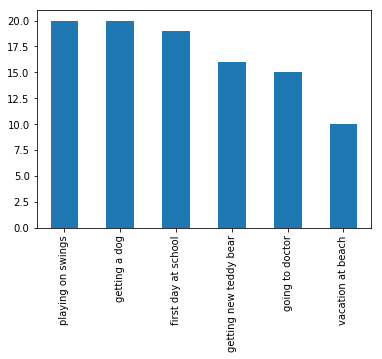

In [303]:
df['First memory'].value_counts().plot('bar')

* Create a tally of values for `First memory` grouped by `Gender`

In [304]:
df.groupby(['First memory','Gender'])['First memory'].count()

First memory            Gender
first day at school     F          6
                        M         13
getting a dog           F         11
                        M          9
getting new teddy bear  F         11
                        M          5
going to doctor         F          9
                        M          6
playing on swings       F          7
                        M         13
vacation at beach       F          4
                        M          6
Name: First memory, dtype: int64

* Plot this grouping

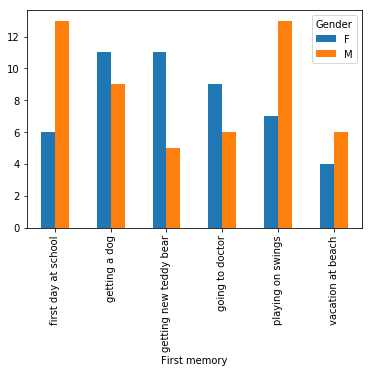

In [305]:
df.groupby(['First memory','Gender'])['First memory'].count().unstack().plot(kind='bar')